# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find the optimal number of clusters

C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

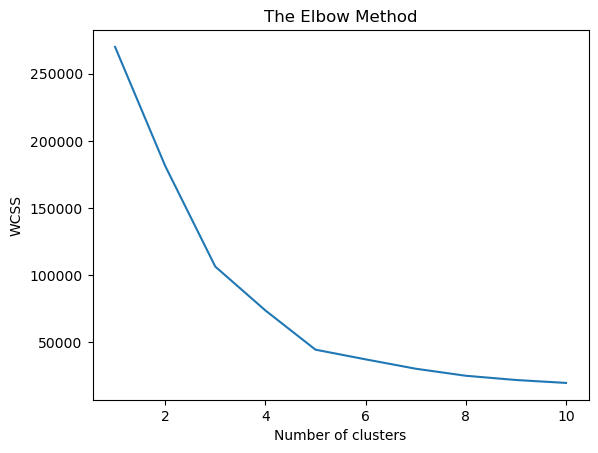

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualising the clusters

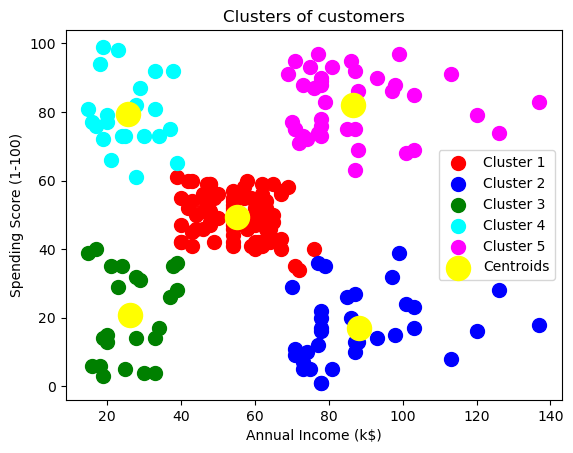

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [7]:
dataset1 = pd.DataFrame({'Group': y_kmeans})

In [8]:
result = pd.concat([dataset, dataset1], axis=1, join='inner')

In [9]:
print(result.query("Group == 1")["Age"].max())
print(result.query("Group == 1")["Age"].min())
print(result.query("Group == 1")["Annual Income (k$)"].max())
print(result.query("Group == 1")["Annual Income (k$)"].min())
print(result.query("Group == 1")["Spending Score (1-100)"].max())
print(result.query("Group == 1")["Spending Score (1-100)"].min())


59
19
137
70
39
1


In [10]:
print(result.query("Group == 2")["Age"].max())
print(result.query("Group == 2")["Age"].min())
print(result.query("Group == 2")["Annual Income (k$)"].max())
print(result.query("Group == 2")["Annual Income (k$)"].min())
print(result.query("Group == 2")["Spending Score (1-100)"].max())
print(result.query("Group == 2")["Spending Score (1-100)"].min())

67
19
39
15
40
3


In [11]:
print(result.query("Group == 3")["Age"].max())
print(result.query("Group == 3")["Age"].min())
print(result.query("Group == 3")["Annual Income (k$)"].max())
print(result.query("Group == 3")["Annual Income (k$)"].min())
print(result.query("Group == 3")["Spending Score (1-100)"].max())
print(result.query("Group == 3")["Spending Score (1-100)"].min())

35
18
39
15
99
61


In [12]:
print(result.query("Group == 4")["Age"].max())
print(result.query("Group == 4")["Age"].min())
print(result.query("Group == 4")["Annual Income (k$)"].max())
print(result.query("Group == 4")["Annual Income (k$)"].min())
print(result.query("Group == 4")["Spending Score (1-100)"].max())
print(result.query("Group == 4")["Spending Score (1-100)"].min())

40
27
137
69
97
63


In [13]:
print(result.query("Group == 0")["Age"].max())
print(result.query("Group == 0")["Age"].min())
print(result.query("Group == 0")["Annual Income (k$)"].max())
print(result.query("Group == 0")["Annual Income (k$)"].min())
print(result.query("Group == 0")["Spending Score (1-100)"].max())
print(result.query("Group == 0")["Spending Score (1-100)"].min())

70
18
76
39
61
34


In [14]:
y_kmeans = kmeans.predict([[17,40]])

In [15]:
y_kmeans

array([2])

In [16]:
y_kmeans[0]

2

In [17]:
y_kmeans = kmeans.fit_predict(X)

C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\92320\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
y_kmeans


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [19]:
import pickle

# Save the model
filename = 'modell.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

# Load the model
with open(filename, 'rb') as file:
    pickled1_model = pickle.load(file)
